<a href="https://colab.research.google.com/github/lbraun6/SE-FJC_Analysis_Pipeline/blob/main/Hannah's_FJC%2B_and_SE_score_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# Install scikit_posthocs package
!pip install scikit_posthocs

# Import statements
from google.colab import files # For uploading files to Google Colab
import pandas as pd # For data structures called dataframes and functions to manipulate them
import numpy as np # For general mathematical functons
import scipy.stats as stats # For functions to run statistical tests
import scikit_posthocs as sp # For specific post-hoc statistical tests
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib as mpl # Basic plotting objects
import matplotlib.pyplot as plt # Basic plotting functions
import seaborn as sns # More advanced/customizable plotting functions
from itertools import combinations

In [45]:
# Load dataset into Google Colab, read into a dataframe, and view
uploaded = files.upload() # Prompts you to select your excel file
df = pd.read_excel("Updated Average SE and Normalized FJC+ Data.xlsx")
clean_df = df.copy()
print(clean_df) # Shows your dataframe

Saving Updated Average SE and Normalized FJC+ Data.xlsx to Updated Average SE and Normalized FJC+ Data (1).xlsx
    Mouse Number  Section Number Genotype     Sex  \
0            465              14       HO  Female   
1            466              14       HO  Female   
2            467              14       HO    Male   
3            469              11       HO    Male   
4            470              13       WT    Male   
5            471              13       WT    Male   
6            473               8       HO  Female   
7            474              11       HO  Female   
8            475              14       HO  Female   
9            476              12       HO  Female   
10           481               7       WT    Male   
11           677               5       HO    Male   
12           678              11      HET    Male   
13           679              15      HET    Male   
14           680              15       WT  Female   
15           681              17       H

In [22]:
# Preprocess/clean data

# mouse_avgs = df.groupby("Mouse Number")[["Average Normalized Hippocampal FJC+ Cell Count",
#                                          "Average Normalized Neocortical FJC+ Cell Count"]].mean().reset_index()

# clean_df = df.pivot(index=["Mouse Number", "Section Number", "Genotype", "Sex"],
#                     columns="Sample Number",
#                     values=["Hippocampus Manual Quantification", "Hippocampus Total Area", "Hippocampus FJC+ Cells per mm²", "Neocortex Manual Quantification", "Neocortex Total Area", "Neocortex FJC+ Cells per mm²"])

# clean_df.columns = [f"Sample {sample} {measurement}" for measurement, sample in clean_df.columns]

# clean_df = clean_df.reset_index()

# clean_df = clean_df.merge(mouse_avgs, on="Mouse Number", how="left")

# clean_df = clean_df.merge(status_df[["Mouse Number", "Average Status Epilepticus Score"]], on="Mouse Number", how="left")

# clean_df.to_excel("Updated Average SE and Normalized FJC+ Data.xlsx", index=False)

# files.download("Updated Average SE and Normalized FJC+ Data.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Independent t-test p-value for male v. female hippocampal FJC+ is 0.5727895813512578
Independent t-test p-value for male v. female neocortical FJC+ is 0.5962157162456747


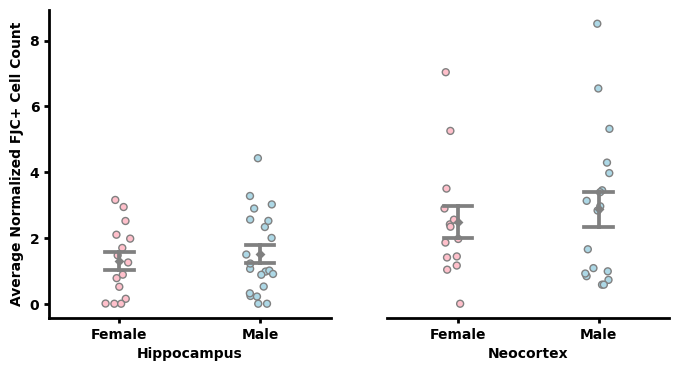


One-way ANOVA (Genotype) for hippocampal FJC+:
                 sum_sq    df         F    PR(>F)
C(Genotype)   9.952469   2.0  4.383043  0.020506
Residual     37.466150  33.0       NaN       NaN

Tukey HSD post-hoc (Hippocampus):
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   HET     HO  -1.2324 0.0181 -2.2791 -0.1858   True
   HET     WT  -0.3917 0.6561 -1.4831  0.6997  False
    HO     WT   0.8408 0.1473 -0.2304  1.9119  False
----------------------------------------------------

One-way ANOVA (Genotype) for neocortical FJC+:
                  sum_sq    df         F    PR(>F)
C(Genotype)   18.813926   2.0  2.448346  0.104109
Residual     111.422930  29.0       NaN       NaN

Tukey HSD post-hoc (Neocortex):
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   HET  

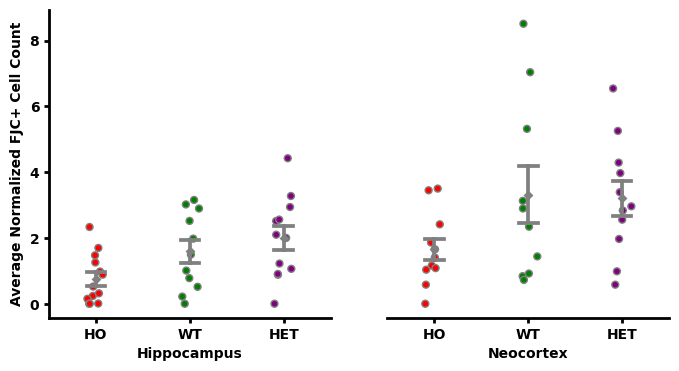

Independent t-test p-value for male v. female SE score is 0.5481432527958003


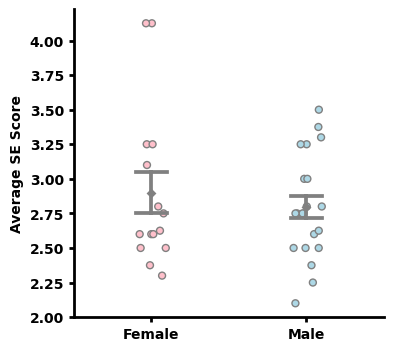


One-way ANOVA (Genotype) for SE score:
                sum_sq    df        F    PR(>F)
C(Genotype)  0.794395   2.0  1.92798  0.161474
Residual     6.798574  33.0      NaN       NaN

Tukey HSD post-hoc (SE Score):
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   HET     HO  -0.2668 0.3188 -0.7127  0.179  False
   HET     WT  -0.3528 0.1657 -0.8177 0.1121  False
    HO     WT   -0.086 0.8891 -0.5423 0.3703  False
---------------------------------------------------


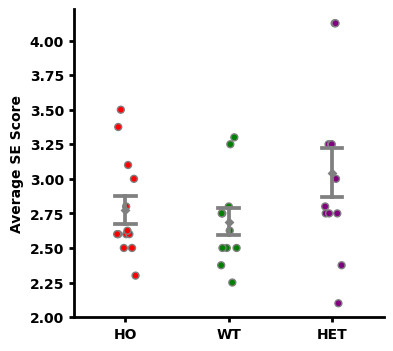

In [46]:
# Make between-group comparison figures, run stats, and display stats on figures
# Font formatting for figures
mpl.rcParams["font.weight"] = "heavy"
mpl.rcParams["axes.labelweight"] = "heavy"
mpl.rcParams["axes.titleweight"] = "heavy"

#-------------------------------------------------------------------------------
# Between group stats (Independent t-tests) for figure 1: Effect of sex on hippocampal and neocortical FJC+ cell count

female_hippocampal_fjc = clean_df.loc[clean_df["Sex"] == "Female", "Average Normalized Hippocampal FJC+ Cell Count"].dropna()
male_hippocampal_fjc = clean_df.loc[clean_df["Sex"] == "Male", "Average Normalized Hippocampal FJC+ Cell Count"].dropna()
sex_hip_fjc_statistic, sex_hip_fjc_p_value = stats.ttest_ind(female_hippocampal_fjc, male_hippocampal_fjc, equal_var=False)
print("Independent t-test p-value for male v. female hippocampal FJC+ is", sex_hip_fjc_p_value)

female_neocortical_fjc = clean_df.loc[clean_df["Sex"] == "Female", "Average Normalized Neocortical FJC+ Cell Count"].dropna()
male_neocortical_fjc = clean_df.loc[clean_df["Sex"] == "Male", "Average Normalized Neocortical FJC+ Cell Count"].dropna()
sex_neo_fjc_statistic, sex_neo_fjc_p_value = stats.ttest_ind(female_neocortical_fjc, male_neocortical_fjc, equal_var=False)
print("Independent t-test p-value for male v. female neocortical FJC+ is", sex_neo_fjc_p_value)

# Plotting functions and formatting for figure 1
fig, ax = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(8, 4)
sns.stripplot(data=clean_df, x="Sex", y="Average Normalized Hippocampal FJC+ Cell Count", hue="Sex", hue_order=["Male", "Female"], palette=["lightblue", "pink"], size=5, edgecolor=".5", linewidth=1, ax=ax[0], zorder=1)
sns.stripplot(data=clean_df, x="Sex", y="Average Normalized Neocortical FJC+ Cell Count", hue="Sex", hue_order=["Male", "Female"], palette=["lightblue", "pink"], size=5, edgecolor=".5", linewidth=1, ax=ax[1], zorder=1)
sns.pointplot(data=clean_df, x="Sex", y="Average Normalized Hippocampal FJC+ Cell Count", errorbar="se", capsize=.2, color=".5", linestyle="none", marker="D", markersize=3, ax=ax[0], zorder=10)
sns.pointplot(data=clean_df, x="Sex", y="Average Normalized Neocortical FJC+ Cell Count", errorbar="se", capsize=.2, color=".5", linestyle="none", marker="D", markersize=3, ax=ax[1], zorder=10)
ax[0].set_xlabel("Hippocampus")
ax[1].set_xlabel("Neocortex")
ax[0].set_ylabel("Average Normalized FJC+ Cell Count")

for a in ax:
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["bottom"].set_linewidth(2)

ax[1].spines["left"].set_visible(False)
ax[0].spines["left"].set_linewidth(2)

ax[1].tick_params(axis="y", length=0)
ax[0].tick_params(axis="x", width=2)
ax[1].tick_params(axis="x", width=2)
ax[0].tick_params(axis="y", width=2)

plt.show()

#-------------------------------------------------------------------------------
# Between group stats (One-way ANOVA + Tukey HSD) for figure 2: Effect of genotype on hippocampal and neocortical FJC+ cell count
# Hippocampus
hip_df = clean_df[["Genotype", "Average Normalized Hippocampal FJC+ Cell Count"]].dropna()
hip_df = hip_df.rename(columns={"Average Normalized Hippocampal FJC+ Cell Count": "Value"})

hip_model = ols("Value ~ C(Genotype)", data=hip_df).fit()
hip_anova = sm.stats.anova_lm(hip_model, typ=2)
print("\nOne-way ANOVA (Genotype) for hippocampal FJC+:\n", hip_anova)

hip_tukey = pairwise_tukeyhsd(endog=hip_df["Value"], groups=hip_df["Genotype"], alpha=0.05)
print("\nTukey HSD post-hoc (Hippocampus):\n", hip_tukey)

# Neocortex
neo_df = clean_df[["Genotype", "Average Normalized Neocortical FJC+ Cell Count"]].dropna()
neo_df = neo_df.rename(columns={"Average Normalized Neocortical FJC+ Cell Count": "Value"})

neo_model = ols("Value ~ C(Genotype)", data=neo_df).fit()
neo_anova = sm.stats.anova_lm(neo_model, typ=2)
print("\nOne-way ANOVA (Genotype) for neocortical FJC+:\n", neo_anova)

neo_tukey = pairwise_tukeyhsd(endog=neo_df["Value"], groups=neo_df["Genotype"], alpha=0.05)
print("\nTukey HSD post-hoc (Neocortex):\n", neo_tukey)

# Plotting functions and formatting for figure 2
fig, ax1 = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(8, 4)
sns.stripplot(data=clean_df, x="Genotype", y="Average Normalized Hippocampal FJC+ Cell Count", hue="Genotype", hue_order=["WT", "HET", "HO"], palette=["green", "purple", "red"], size=5, edgecolor=".5", linewidth=1, ax=ax1[0], zorder=1)
sns.stripplot(data=clean_df, x="Genotype", y="Average Normalized Neocortical FJC+ Cell Count", hue="Genotype", hue_order=["WT", "HET", "HO"], palette=["green", "purple", "red"], size=5, edgecolor=".5", linewidth=1, ax=ax1[1], zorder=1)
sns.pointplot(data=clean_df, x="Genotype", y="Average Normalized Hippocampal FJC+ Cell Count", errorbar="se", capsize=.2, color=".5", linestyle="none", marker="D", markersize=3, ax=ax1[0], zorder=10)
sns.pointplot(data=clean_df, x="Genotype", y="Average Normalized Neocortical FJC+ Cell Count", errorbar="se", capsize=.2, color=".5", linestyle="none", marker="D", markersize=3, ax=ax1[1], zorder=10)
ax1[0].set_xlabel("Hippocampus")
ax1[1].set_xlabel("Neocortex")
ax1[0].set_ylabel("Average Normalized FJC+ Cell Count")

for a in ax1:
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["bottom"].set_linewidth(2)

ax1[1].spines["left"].set_visible(False)
ax1[0].spines["left"].set_linewidth(2)

ax1[1].tick_params(axis="y", length=0)
ax1[0].tick_params(axis="x", width=2)
ax1[1].tick_params(axis="x", width=2)
ax1[0].tick_params(axis="y", width=2)

plt.show()

#-------------------------------------------------------------------------------
# Between group stats (Independent t-tests) for figure 3: Effect of sex on average status epilepticus score

female_se = clean_df.loc[clean_df["Sex"] == "Female", "Average Status Epilepticus Score"].dropna()
male_se = clean_df.loc[clean_df["Sex"] == "Male", "Average Status Epilepticus Score"].dropna()
sex_se_statistic, sex_se_p_value = stats.ttest_ind(female_se, male_se, equal_var=False)
print("Independent t-test p-value for male v. female SE score is", sex_se_p_value)

# Plotting functions and formatting for figure 3
fig, ax2 = plt.subplots()
fig.set_size_inches(4, 4)
sns.stripplot(data=clean_df, x="Sex", y="Average Status Epilepticus Score", hue="Sex", hue_order=["Male", "Female"], palette=["lightblue", "pink"], size=5, edgecolor=".5", linewidth=1, ax=ax2, zorder=1)
sns.pointplot(data=clean_df, x="Sex", y="Average Status Epilepticus Score", errorbar="se", capsize=.2, color=".5", linestyle="none", marker="D", markersize=3, ax=ax2, zorder=10)
ax2.set_xlabel("")
ax2.set_ylabel("Average SE Score")

ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_linewidth(2)
ax2.spines["left"].set_linewidth(2)
ax2.tick_params(axis="x", width=2)
ax2.tick_params(axis="y", width=2)

plt.show()

#-------------------------------------------------------------------------------
# Between group stats (One-way ANOVA + Tukey HSD) for figure 4: Effect of genotype on average status epilepticus score

score_df = clean_df[["Genotype", "Average Status Epilepticus Score"]].dropna()
score_df = score_df.rename(columns={"Average Status Epilepticus Score": "Value"})

score_model = ols("Value ~ C(Genotype)", data=score_df).fit()
score_anova = sm.stats.anova_lm(score_model, typ=2)
print("\nOne-way ANOVA (Genotype) for SE score:\n", score_anova)

score_tukey = pairwise_tukeyhsd(endog=score_df["Value"], groups=score_df["Genotype"], alpha=0.05)
print("\nTukey HSD post-hoc (SE Score):\n", score_tukey)

# Plotting functions and formatting for figure 4
fig, ax3 = plt.subplots()
fig.set_size_inches(4, 4)
sns.stripplot(data=clean_df, x="Genotype", y="Average Status Epilepticus Score", hue="Genotype", hue_order=["WT", "HET", "HO"], palette=["green", "purple", "red"], size=5, edgecolor=".5", linewidth=1, ax=ax3, zorder=1)
sns.pointplot(data=clean_df, x="Genotype", y="Average Status Epilepticus Score", errorbar="se", capsize=.2, color=".5", linestyle="none", marker="D", markersize=3, ax=ax3, zorder=10)
ax3.set_xlabel("")
ax3.set_ylabel("Average SE Score")

ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.spines["bottom"].set_linewidth(2)
ax3.spines["left"].set_linewidth(2)
ax3.tick_params(axis="x", width=2)
ax3.tick_params(axis="y", width=2)

plt.show()


Average Normalized Hippocampal Pearson correlation (rho): 0.138
Male Hippocampal Pearson correlation (rho): -0.002
Female Hippocampal Pearson correlation (rho): 0.328


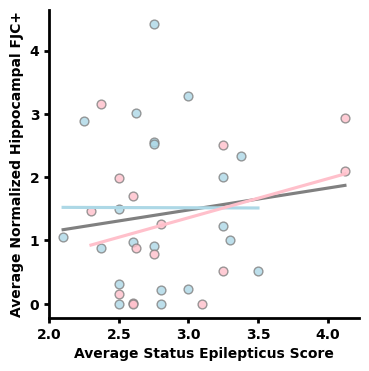

Average Normalized Neocortical Pearson correlation (rho): -0.158
Male Neocortical Pearson correlation (rho): -0.383
Female Neocortical Pearson correlation (rho): 0.094


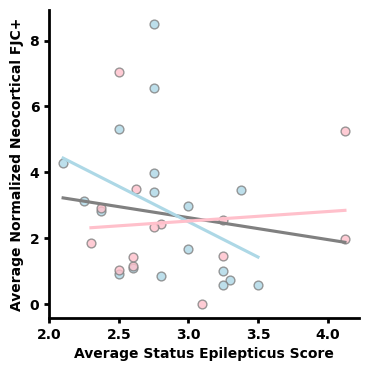

Average Normalized Hippocampal Pearson correlation (rho): 0.138
WT Hippocampal Pearson correlation (rho): -0.515
HET Hippocampal Pearson correlation (rho): 0.309
HET Hippocampal Pearson correlation (rho): 0.127


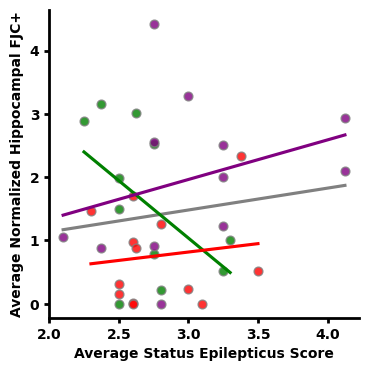

Average Normalized Hippocampal Pearson correlation (rho): -0.158
WT Hippocampal Pearson correlation (rho): -0.353
HET Hippocampal Pearson correlation (rho): -0.203
HET Hippocampal Pearson correlation (rho): -0.046


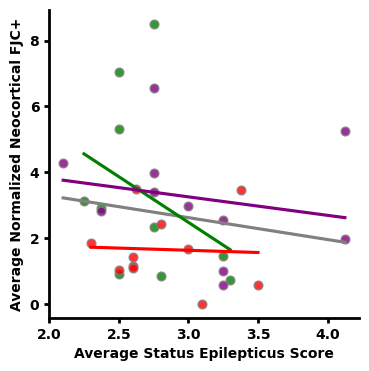

In [47]:
# Make correlation figures, run stats, and display stats on figures
# Font formatting for figures
mpl.rcParams["font.weight"] = "heavy"
mpl.rcParams["axes.labelweight"] = "heavy"
mpl.rcParams["axes.titleweight"] = "heavy"

# Cleaning and splitting data into subsets for sex and region
hip_df = clean_df.dropna(subset=["Average Status Epilepticus Score", "Average Normalized Hippocampal FJC+ Cell Count"])
male_hip_df = hip_df.loc[hip_df["Sex"] == "Male"]
female_hip_df = hip_df.loc[hip_df["Sex"] == "Female"]

neo_df = clean_df.dropna(subset=["Average Status Epilepticus Score", "Average Normalized Neocortical FJC+ Cell Count"])
male_neo_df = neo_df.loc[neo_df["Sex"] == "Male"]
female_neo_df = neo_df.loc[neo_df["Sex"] == "Female"]

#-------------------------------------------------------------------------------

# Correlation stats (Pearson correlation coefficient) for figure 5: Scatterplots, simple linear regression, and correlation of hippocampal FJC+ and average SE score for Average Normalized sample, male animals, and female animals
hip_rho, hip_p_value = stats.pearsonr(hip_df["Average Status Epilepticus Score"], hip_df["Average Normalized Hippocampal FJC+ Cell Count"])
print(f"Average Normalized Hippocampal Pearson correlation (rho): {hip_rho:.3f}")

male_hip_rho, male_hip_p_value = stats.pearsonr(male_hip_df["Average Status Epilepticus Score"], male_hip_df["Average Normalized Hippocampal FJC+ Cell Count"])
print(f"Male Hippocampal Pearson correlation (rho): {male_hip_rho:.3f}")

female_hip_rho, female_hip_p_value = stats.pearsonr(female_hip_df["Average Status Epilepticus Score"], female_hip_df["Average Normalized Hippocampal FJC+ Cell Count"])
print(f"Female Hippocampal Pearson correlation (rho): {female_hip_rho:.3f}")

# Plotting functions and formatting for figure 5
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.regplot(data=hip_df, x="Average Status Epilepticus Score", y="Average Normalized Hippocampal FJC+ Cell Count", ci=None, color=".5", scatter_kws={"s": 0}, ax=ax)
sns.regplot(data=male_hip_df, x="Average Status Epilepticus Score", y="Average Normalized Hippocampal FJC+ Cell Count", ci=None, color="lightblue", scatter_kws={"s": 40, "edgecolors": ".5", "linewidths": 1}, ax=ax)
sns.regplot(data=female_hip_df, x="Average Status Epilepticus Score", y="Average Normalized Hippocampal FJC+ Cell Count", ci=None, color="pink", scatter_kws={"s": 40, "edgecolors": ".5", "linewidths": 1}, ax=ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)

ax.tick_params(axis="x", width=2)
ax.tick_params(axis="y", width=2)

ax.set_ylabel("Average Normalized Hippocampal FJC+")

plt.show()

#-------------------------------------------------------------------------------

# Correlation stats (Pearson correlation coefficient) for figure 6: Scatterplots, simple linear regression, and correlation of neocortical FJC+ and average SE score for Average Normalized sample, male animals, and female animals
neo_rho, neo_p_value = stats.pearsonr(neo_df["Average Status Epilepticus Score"], neo_df["Average Normalized Neocortical FJC+ Cell Count"])
print(f"Average Normalized Neocortical Pearson correlation (rho): {neo_rho:.3f}")

male_neo_rho, male_neo_p_value = stats.pearsonr(male_neo_df["Average Status Epilepticus Score"], male_neo_df["Average Normalized Neocortical FJC+ Cell Count"])
print(f"Male Neocortical Pearson correlation (rho): {male_neo_rho:.3f}")

female_neo_rho, female_neo_p_value = stats.pearsonr(female_neo_df["Average Status Epilepticus Score"], female_neo_df["Average Normalized Neocortical FJC+ Cell Count"])
print(f"Female Neocortical Pearson correlation (rho): {female_neo_rho:.3f}")

# Plotting functions and formatting for figure 6
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.regplot(data=neo_df, x="Average Status Epilepticus Score", y="Average Normalized Neocortical FJC+ Cell Count", ci=None, color=".5", scatter_kws={"s": 0}, ax=ax)
sns.regplot(data=male_neo_df, x="Average Status Epilepticus Score", y="Average Normalized Neocortical FJC+ Cell Count", ci=None, color="lightblue", scatter_kws={"s": 40, "edgecolors": ".5", "linewidths": 1}, ax=ax)
sns.regplot(data=female_neo_df, x="Average Status Epilepticus Score", y="Average Normalized Neocortical FJC+ Cell Count", ci=None, color="pink", scatter_kws={"s": 40, "edgecolors": ".5", "linewidths": 1}, ax=ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)

ax.tick_params(axis="x", width=2)
ax.tick_params(axis="y", width=2)

ax.set_ylabel("Average Normalized Neocortical FJC+")

plt.show()

#-------------------------------------------------------------------------------

# Splitting data into subsets for genotype and region
wt_hip_df = hip_df.loc[hip_df["Genotype"] == "WT"]
het_hip_df = hip_df.loc[hip_df["Genotype"] == "HET"]
ho_hip_df = hip_df.loc[hip_df["Genotype"] == "HO"]

wt_neo_df = neo_df.loc[neo_df["Genotype"] == "WT"]
het_neo_df = neo_df.loc[neo_df["Genotype"] == "HET"]
ho_neo_df = neo_df.loc[neo_df["Genotype"] == "HO"]

#-------------------------------------------------------------------------------

# Correlation stats (Pearson correlation coefficient) for figure 7: Scatterplots, simple linear regression, and correlation of hippocampal FJC+ and average SE score for Average Normalized sample, WT animals, HET animals and HO animals
hip_rho, hip_p_value = stats.pearsonr(hip_df["Average Status Epilepticus Score"], hip_df["Average Normalized Hippocampal FJC+ Cell Count"])
print(f"Average Normalized Hippocampal Pearson correlation (rho): {hip_rho:.3f}")

wt_hip_rho, wt_hip_p_value = stats.pearsonr(wt_hip_df["Average Status Epilepticus Score"], wt_hip_df["Average Normalized Hippocampal FJC+ Cell Count"])
print(f"WT Hippocampal Pearson correlation (rho): {wt_hip_rho:.3f}")

het_hip_rho, het_hip_p_value = stats.pearsonr(het_hip_df["Average Status Epilepticus Score"], het_hip_df["Average Normalized Hippocampal FJC+ Cell Count"])
print(f"HET Hippocampal Pearson correlation (rho): {het_hip_rho:.3f}")

ho_hip_rho, ho_hip_p_value = stats.pearsonr(ho_hip_df["Average Status Epilepticus Score"], ho_hip_df["Average Normalized Hippocampal FJC+ Cell Count"])
print(f"HET Hippocampal Pearson correlation (rho): {ho_hip_rho:.3f}")

# Plotting functions and formatting for figure 7
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.regplot(data=hip_df, x="Average Status Epilepticus Score", y="Average Normalized Hippocampal FJC+ Cell Count", ci=None, color=".5", scatter_kws={"s": 0}, ax=ax)
sns.regplot(data=wt_hip_df, x="Average Status Epilepticus Score", y="Average Normalized Hippocampal FJC+ Cell Count", ci=None, color="green", scatter_kws={"s": 40, "edgecolors": ".5", "linewidths": 1}, ax=ax)
sns.regplot(data=het_hip_df, x="Average Status Epilepticus Score", y="Average Normalized Hippocampal FJC+ Cell Count", ci=None, color="purple", scatter_kws={"s": 40, "edgecolors": ".5", "linewidths": 1}, ax=ax)
sns.regplot(data=ho_hip_df, x="Average Status Epilepticus Score", y="Average Normalized Hippocampal FJC+ Cell Count", ci=None, color="red", scatter_kws={"s": 40, "edgecolors": ".5", "linewidths": 1}, ax=ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)

ax.tick_params(axis="x", width=2)
ax.tick_params(axis="y", width=2)

ax.set_ylabel("Average Normalized Hippocampal FJC+")

plt.show()

#-------------------------------------------------------------------------------

# Correlation stats (Pearson correlation coefficient) for figure 8: Scatterplots, simple linear regression, and correlation of neocortical FJC+ and average SE score for Average Normalized sample, WT animals, HET animals and HO animals
neo_rho, neo_p_value = stats.pearsonr(neo_df["Average Status Epilepticus Score"], neo_df["Average Normalized Neocortical FJC+ Cell Count"])
print(f"Average Normalized Hippocampal Pearson correlation (rho): {neo_rho:.3f}")

wt_neo_rho, wt_neo_p_value = stats.pearsonr(wt_neo_df["Average Status Epilepticus Score"], wt_neo_df["Average Normalized Neocortical FJC+ Cell Count"])
print(f"WT Hippocampal Pearson correlation (rho): {wt_neo_rho:.3f}")

het_neo_rho, het_neo_p_value = stats.pearsonr(het_neo_df["Average Status Epilepticus Score"], het_neo_df["Average Normalized Neocortical FJC+ Cell Count"])
print(f"HET Hippocampal Pearson correlation (rho): {het_neo_rho:.3f}")

ho_neo_rho, ho_neo_p_value = stats.pearsonr(ho_neo_df["Average Status Epilepticus Score"], ho_neo_df["Average Normalized Neocortical FJC+ Cell Count"])
print(f"HET Hippocampal Pearson correlation (rho): {ho_neo_rho:.3f}")

# Plotting functions and formatting for figure 8
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.regplot(data=neo_df, x="Average Status Epilepticus Score", y="Average Normalized Neocortical FJC+ Cell Count", ci=None, color=".5", scatter_kws={"s": 0}, ax=ax)
sns.regplot(data=wt_neo_df, x="Average Status Epilepticus Score", y="Average Normalized Neocortical FJC+ Cell Count", ci=None, color="green", scatter_kws={"s": 40, "edgecolors": ".5", "linewidths": 1}, ax=ax)
sns.regplot(data=het_neo_df, x="Average Status Epilepticus Score", y="Average Normalized Neocortical FJC+ Cell Count", ci=None, color="purple", scatter_kws={"s": 40, "edgecolors": ".5", "linewidths": 1}, ax=ax)
sns.regplot(data=ho_neo_df, x="Average Status Epilepticus Score", y="Average Normalized Neocortical FJC+ Cell Count", ci=None, color="red", scatter_kws={"s": 40, "edgecolors": ".5", "linewidths": 1}, ax=ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)

ax.tick_params(axis="x", width=2)
ax.tick_params(axis="y", width=2)

ax.set_ylabel("Average Normalized Neocortical FJC+")

plt.show()


Two-way ANOVA (Sex, Genotype) for Average Normalized Hippocampal FJC+ Cell Count:
                        sum_sq    df         F    PR(>F)
C(Sex)               0.132102   1.0  0.109369  0.743162
C(Genotype)          9.656410   2.0  3.997359  0.028905
C(Sex):C(Genotype)   1.098587   2.0  0.454770  0.638897
Residual            36.235462  30.0       NaN       NaN

Two-way ANOVA (Sex, Genotype) for Average Normalized Neocortical FJC+ Cell Count:
                         sum_sq    df         F    PR(>F)
C(Sex)                0.025501   1.0  0.005956  0.939074
C(Genotype)          17.672555   2.0  2.063862  0.147262
C(Sex):C(Genotype)    0.080278   2.0  0.009375  0.990672
Residual            111.317151  26.0       NaN       NaN


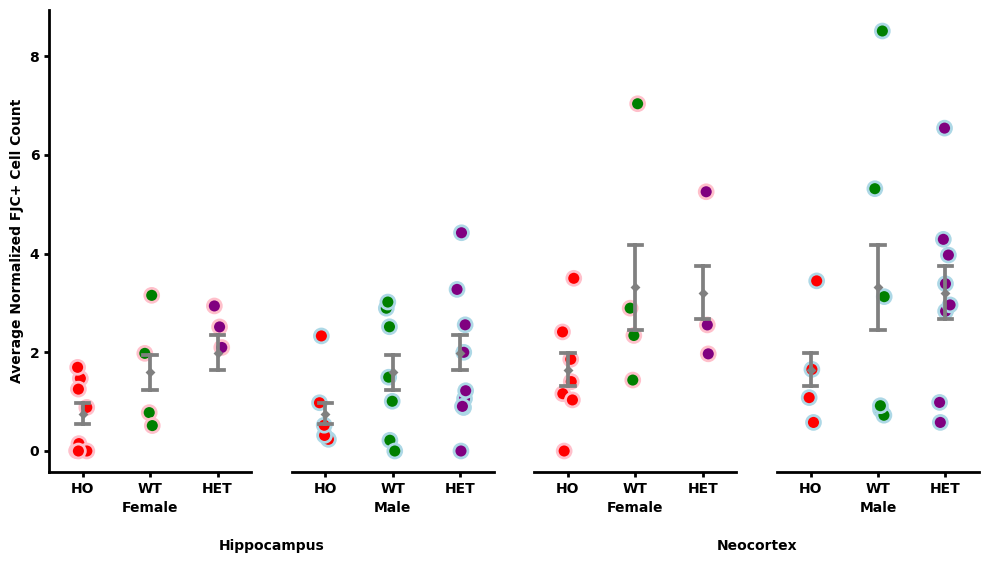


Two-way ANOVA (Sex, Genotype) for SE score:
                sum_sq    df         F    PR(>F)
C(Sex)       0.245332   1.0  1.197976  0.281897
C(Genotype)  0.945865   2.0  2.309367  0.115650
Residual     6.553242  32.0       NaN       NaN


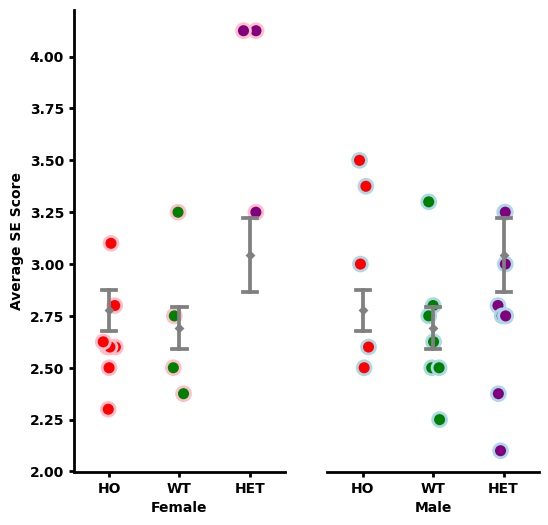

In [52]:
# Make between-group comparison figures, run stats, and display stats on figures
# Font formatting for figures
mpl.rcParams["font.weight"] = "heavy"
mpl.rcParams["axes.labelweight"] = "heavy"
mpl.rcParams["axes.titleweight"] = "heavy"

#-------------------------------------------------------------------------------
# Stats for figure 9
hip_anova_df = clean_df[["Sex", "Genotype", "Average Normalized Hippocampal FJC+ Cell Count"]].dropna()
hip_anova_df = hip_anova_df.rename(columns={"Average Normalized Hippocampal FJC+ Cell Count": "Value"})

hip_anova_model = ols("Value ~ C(Sex) * C(Genotype)", data=hip_anova_df).fit()
hip_anova = sm.stats.anova_lm(hip_anova_model, typ=2)

print("\nTwo-way ANOVA (Sex, Genotype) for Average Normalized Hippocampal FJC+ Cell Count:\n", hip_anova)

neo_anova_df = clean_df[["Sex", "Genotype", "Average Normalized Neocortical FJC+ Cell Count"]].dropna()
neo_anova_df = neo_anova_df.rename(columns={"Average Normalized Neocortical FJC+ Cell Count": "Value"})

neo_anova_model = ols("Value ~ C(Sex) * C(Genotype)", data=neo_anova_df).fit()
neo_anova = sm.stats.anova_lm(neo_anova_model, typ=2)

print("\nTwo-way ANOVA (Sex, Genotype) for Average Normalized Neocortical FJC+ Cell Count:\n", neo_anova)

# Plotting functions and formatting for figure 9
fig, ax1 = plt.subplots(1, 4, sharey=True)
fig.set_size_inches(12, 6)
sns.stripplot(data=clean_df[clean_df["Sex"] == "Female"], x="Genotype", y="Average Normalized Hippocampal FJC+ Cell Count", hue="Genotype", hue_order=["WT", "HET", "HO"], palette=["green", "purple", "red"], size=10, edgecolor="pink", linewidth=2, ax=ax1[0], legend=False, zorder=1)
sns.stripplot(data=clean_df[clean_df["Sex"] == "Male"], x="Genotype", y="Average Normalized Hippocampal FJC+ Cell Count", hue="Genotype", hue_order=["WT", "HET", "HO"], palette=["green", "purple", "red"], size=10, edgecolor="lightblue", linewidth=2, ax=ax1[1], legend=False, zorder=1)
sns.stripplot(data=clean_df[clean_df["Sex"] == "Female"], x="Genotype", y="Average Normalized Neocortical FJC+ Cell Count", hue="Genotype", hue_order=["WT", "HET", "HO"], palette=["green", "purple", "red"], size=10, edgecolor="pink", linewidth=2, ax=ax1[2], legend=False, zorder=1)
sns.stripplot(data=clean_df[clean_df["Sex"] == "Male"], x="Genotype", y="Average Normalized Neocortical FJC+ Cell Count", hue="Genotype", hue_order=["WT", "HET", "HO"], palette=["green", "purple", "red"], size=10, edgecolor="lightblue", linewidth=2, ax=ax1[3], legend=False, zorder=1)

sns.pointplot(data=clean_df, x="Genotype", y="Average Normalized Hippocampal FJC+ Cell Count", hue="Genotype", hue_order=["WT", "HET", "HO"], errorbar="se", capsize=.2, palette=[".5", ".5", ".5"], linestyle="none", marker="D", markersize=3, ax=ax1[0], legend=False, zorder=10)
sns.pointplot(data=clean_df, x="Genotype", y="Average Normalized Hippocampal FJC+ Cell Count", hue="Genotype", hue_order=["WT", "HET", "HO"], errorbar="se", capsize=.2, palette=[".5", ".5", ".5"], linestyle="none", marker="D", markersize=3, ax=ax1[1], legend=False, zorder=10)
sns.pointplot(data=clean_df, x="Genotype", y="Average Normalized Neocortical FJC+ Cell Count", hue="Genotype", hue_order=["WT", "HET", "HO"], errorbar="se", capsize=.2, palette=[".5", ".5", ".5"], linestyle="none", marker="D", markersize=3, ax=ax1[2], legend=False, zorder=10)
sns.pointplot(data=clean_df, x="Genotype", y="Average Normalized Neocortical FJC+ Cell Count", hue="Genotype", hue_order=["WT", "HET", "HO"], errorbar="se", capsize=.2, palette=[".5", ".5", ".5"], linestyle="none", marker="D", markersize=3, ax=ax1[3], legend=False, zorder=10)

ax1[0].set_xlabel("Female")
ax1[1].set_xlabel("Male")
ax1[2].set_xlabel("Female")
ax1[3].set_xlabel("Male")
ax1[0].set_ylabel("Average Normalized FJC+ Cell Count")

for a in ax1:
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["bottom"].set_linewidth(2)

ax1[1].spines["left"].set_visible(False)
ax1[2].spines["left"].set_visible(False)
ax1[3].spines["left"].set_visible(False)
ax1[0].spines["left"].set_linewidth(2)

ax1[1].tick_params(axis="y", length=0)
ax1[2].tick_params(axis="y", length=0)
ax1[3].tick_params(axis="y", length=0)
ax1[0].tick_params(axis="x", width=2)

ax1[1].tick_params(axis="x", width=2)
ax1[2].tick_params(axis="x", width=2)
ax1[3].tick_params(axis="x", width=2)
ax1[0].tick_params(axis="y", width=2)

y_loc = -0.025

pos1 = ax1[0].get_position()
pos2 = ax1[1].get_position()
x_mid = (pos1.x0 + pos1.x1 + pos2.x0 + pos2.x1) / 4
fig.text(x_mid, y_loc, "Hippocampus", ha='center', va='bottom')

pos3 = ax1[2].get_position()
pos4 = ax1[3].get_position()
x_mid = (pos3.x0 + pos3.x1 + pos4.x0 + pos4.x1) / 4
fig.text(x_mid, y_loc, "Neocortex", ha='center', va='bottom')

plt.show()

#-------------------------------------------------------------------------------
# Stats for figure 10
score_df = clean_df[["Sex", "Genotype", "Average Status Epilepticus Score"]].dropna()
score_df = score_df.rename(columns={"Average Status Epilepticus Score": "Value"})

score_model = ols("Value ~ C(Sex) + C(Genotype)", data=score_df).fit()
score_anova = sm.stats.anova_lm(score_model, typ=2)

print("\nTwo-way ANOVA (Sex, Genotype) for SE score:\n", score_anova)

# Plotting functions and formatting for figure 10
fig, ax2 = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(6, 6)
sns.stripplot(data=clean_df[clean_df["Sex"] == "Female"], x="Genotype", y="Average Status Epilepticus Score", hue="Genotype", hue_order=["WT", "HET", "HO"], palette=["green", "purple", "red"], size=10, edgecolor="pink", linewidth=2, ax=ax2[0], legend=False, zorder=1)
sns.stripplot(data=clean_df[clean_df["Sex"] == "Male"], x="Genotype", y="Average Status Epilepticus Score", hue="Genotype", hue_order=["WT", "HET", "HO"], palette=["green", "purple", "red"], size=10, edgecolor="lightblue", linewidth=2, ax=ax2[1], legend=False, zorder=1)

sns.pointplot(data=clean_df, x="Genotype", y="Average Status Epilepticus Score", hue="Genotype", hue_order=["WT", "HET", "HO"], errorbar="se", capsize=.2, palette=[".5", ".5", ".5"], linestyle="none", marker="D", markersize=3, ax=ax2[0], legend=False, zorder=10)
sns.pointplot(data=clean_df, x="Genotype", y="Average Status Epilepticus Score", hue="Genotype", hue_order=["WT", "HET", "HO"], errorbar="se", capsize=.2, palette=[".5", ".5", ".5"], linestyle="none", marker="D", markersize=3, ax=ax2[1], legend=False, zorder=10)

ax2[0].set_xlabel("Female")
ax2[1].set_xlabel("Male")
ax2[0].set_ylabel("Average SE Score")

for a in ax2:
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["bottom"].set_linewidth(2)

ax2[1].spines["left"].set_visible(False)
ax2[0].spines["left"].set_linewidth(2)

ax2[1].tick_params(axis="y", length=0)
ax2[0].tick_params(axis="x", width=2)

ax2[1].tick_params(axis="x", width=2)
ax2[0].tick_params(axis="y", width=2)

plt.show()

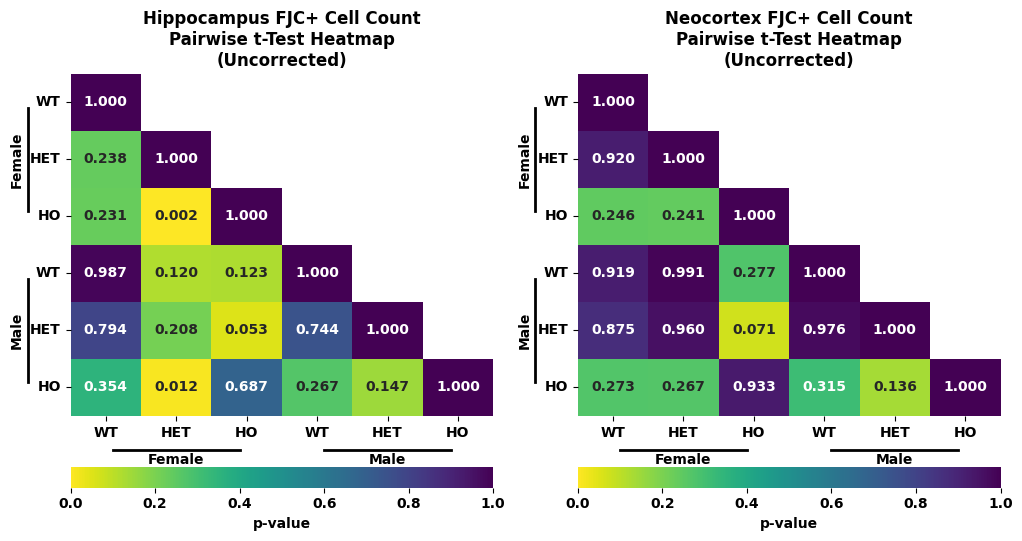

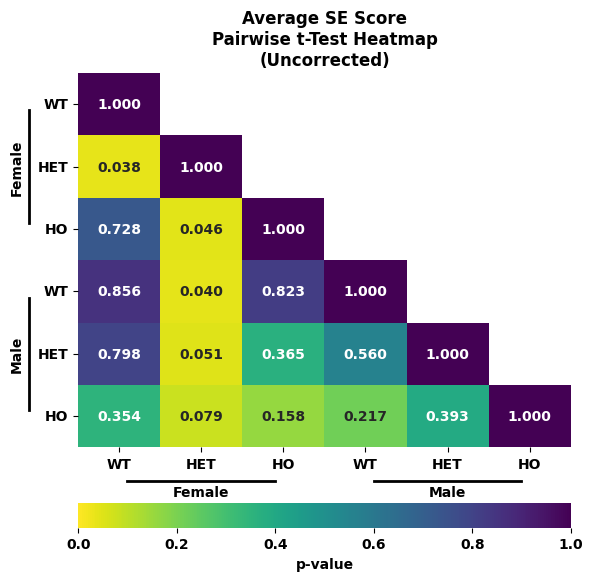

In [49]:
clean_df = clean_df.copy()
clean_df["Group"] = clean_df["Sex"].astype(str) + "_" + clean_df["Genotype"].astype(str)
group_order = ["Female_WT", "Female_HET", "Female_HO", "Male_WT", "Male_HET", "Male_HO"]
clean_df["Group"] = pd.Categorical(clean_df["Group"], categories=group_order, ordered=True)

# Function to compute uncorrected pairwise t-test p-values matrix
def pairwise_ttest_matrix(df, value_col, group_col, categories):
    matrix = pd.DataFrame(np.ones((len(categories), len(categories))), index=categories, columns=categories)
    for g1, g2 in combinations(categories, 2):
        x = df.loc[df[group_col] == g1, value_col].dropna()
        y = df.loc[df[group_col] == g2, value_col].dropna()
        if len(x) > 0 and len(y) > 0:
            p = stats.ttest_ind(x, y, equal_var=False).pvalue
        else:
            p = np.nan
        matrix.loc[g1, g2] = p
        matrix.loc[g2, g1] = p
    return matrix

hip_pvals = pairwise_ttest_matrix(clean_df, "Average Normalized Hippocampal FJC+ Cell Count", "Group", group_order)
neo_pvals = pairwise_ttest_matrix(clean_df, "Average Normalized Neocortical FJC+ Cell Count", "Group", group_order)
pvals = [hip_pvals, neo_pvals]

hip_mask = np.triu(np.ones_like(hip_pvals, dtype=bool), k=1)
neo_mask = np.triu(np.ones_like(neo_pvals, dtype=bool), k=1)
masks = [hip_mask, neo_mask]

titles = ["Hippocampus", "Neocortex"]

fig, axes = plt.subplots(1, 2, figsize=(12,6))

for ax, mask, pval, title in zip(axes, masks, pvals, titles):
    sns.heatmap(pval, annot=True, fmt=".3f", cmap="viridis_r", mask=mask,
                vmin=0, vmax=1, cbar_kws={"orientation":"horizontal","pad":0.11,"label":"p-value"}, ax=ax)
    ax.set_xticklabels(["WT","HET","HO","WT","HET","HO"], rotation=0)
    ax.set_yticklabels(["WT","HET","HO","WT","HET","HO"], rotation=0)
    ax.set_title(title + " FJC+ Cell Count" + "\n" + "Pairwise t-Test Heatmap\n(Uncorrected)")

    ax.annotate("Male", xy=(-0.11, 0.25), xycoords="axes fraction", rotation=90, ha="right", va="center", clip_on=False)
    ax.annotate("Female", xy=(-0.11, 0.75), xycoords="axes fraction", rotation=90, ha="right", va="center", clip_on=False)

    ax.annotate("Female", xy=(0.25, -0.11), xycoords="axes fraction", rotation=0, ha="center", va="top", clip_on=False)
    ax.annotate("Male", xy=(0.75, -0.11), xycoords="axes fraction", rotation=0, ha="center", va="top", clip_on=False)

    line_length = 0.3
    ax.plot([0.25 - line_length/2, 0.25 + line_length/2], [-0.1, -0.1], transform=ax.transAxes, color="black", lw=2, clip_on=False)
    ax.plot([0.75 - line_length/2, 0.75 + line_length/2], [-0.1, -0.1], transform=ax.transAxes, color="black", lw=2, clip_on=False)
    ax.plot([-0.1, -0.1], [0.25 - line_length/2, 0.25 + line_length/2], transform=ax.transAxes, color="black", lw=2, clip_on=False)
    ax.plot([-0.1, -0.1], [0.75 - line_length/2, 0.75 + line_length/2], transform=ax.transAxes, color="black", lw=2, clip_on=False)

#-------------------------------------------------------------------------------
se_pvals = pairwise_ttest_matrix(clean_df, "Average Status Epilepticus Score", "Group", group_order)
fig, ax = plt.subplots(1, 1, figsize=(6,6))

sns.heatmap(se_pvals, annot=True, fmt=".3f", cmap="viridis_r", mask=hip_mask, vmin=0, vmax=1, cbar_kws={"orientation":"horizontal","pad":0.11,"label":"p-value"}, ax=ax)
ax.set_xticklabels(["WT","HET","HO","WT","HET","HO"], rotation=0)
ax.set_yticklabels(["WT","HET","HO","WT","HET","HO"], rotation=0)
ax.set_title("Average SE Score" + "\n" + "Pairwise t-Test Heatmap\n(Uncorrected)")

ax.annotate("Male", xy=(-0.11, 0.25), xycoords="axes fraction", rotation=90, ha="right", va="center", clip_on=False)
ax.annotate("Female", xy=(-0.11, 0.75), xycoords="axes fraction", rotation=90, ha="right", va="center", clip_on=False)

ax.annotate("Female", xy=(0.25, -0.1), xycoords="axes fraction", rotation=0, ha="center", va="top", clip_on=False)
ax.annotate("Male", xy=(0.75, -0.1), xycoords="axes fraction", rotation=0, ha="center", va="top", clip_on=False)

line_length = 0.3
ax.plot([0.25 - line_length/2, 0.25 + line_length/2], [-0.09, -0.09], transform=ax.transAxes, color="black", lw=2, clip_on=False)
ax.plot([0.75 - line_length/2, 0.75 + line_length/2], [-0.09, -0.09], transform=ax.transAxes, color="black", lw=2, clip_on=False)
ax.plot([-0.1, -0.1], [0.25 - line_length/2, 0.25 + line_length/2], transform=ax.transAxes, color="black", lw=2, clip_on=False)
ax.plot([-0.1, -0.1], [0.75 - line_length/2, 0.75 + line_length/2], transform=ax.transAxes, color="black", lw=2, clip_on=False)

plt.tight_layout()
plt.show()